In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [4]:
df = pd.read_csv ("census-income.data.csv", index_col = None, names=['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', "hours_per_week", "native_country", 'income'])

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#looking at the datatype
print(df.info())

#have to transform the variables for regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [7]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
#encoding categorical variables to numeric codes
from sklearn.preprocessing import LabelEncoder

#calling labelencoder
lab_enc = LabelEncoder()

#performing label encoding in the select features
df['workclass'] = lab_enc.fit_transform(df['workclass'])
df['education'] = lab_enc.fit_transform(df['education'])
df['marital_status'] = lab_enc.fit_transform(df['marital_status'])
df['occupation'] = lab_enc.fit_transform(df['occupation'])
df['relationship'] = lab_enc.fit_transform(df['relationship'])
df['race'] = lab_enc.fit_transform(df['race'])
df['sex'] = lab_enc.fit_transform(df['sex'])
df['native_country'] = lab_enc.fit_transform(df['native_country'])


In [9]:
print(df['income'].value_counts())
#  # <=50K    24720
#  # >50K      7841

#Encoding for label. If <=50k then 0 else 1
label_info = {' <=50K':0, ' >50K':1}
df['income'] = df['income'].map(label_info)
# # source:https://stackoverflow.com/questions/65716571/encoding-column-pandas-using-if-condition

# # after encoding 
print(f"After encoding", df['income'].value_counts())

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64
After encoding income
0    24720
1     7841
Name: count, dtype: int64


In [10]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [11]:
#Selecting features and splitting the datasets into features and label
selected_features = ['age', 'workclass', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', "hours_per_week", "native_country"]

x = df[selected_features] #feature
y = df.income #label

In [12]:
#Splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=7)

In [13]:
#Logistic Regression
#Source: https://www.datacamp.com/tutorial/understanding-logistic-regression-python?irclickid=XPG32xUYdxyPWbHWdp29132wUkFSTqSZwQmx3c0&irgwc=1&im_rewards=1&utm_medium=affiliate&utm_source=impact&utm_campaign=000000_1-2003851_2-mix_3-all_4-na_5-na_6-na_7-mp_8-affl-ip_9-na_10-bau_11-Bing%20Rebates%20by%20Microsoft&utm_content=BANNER&utm_term=EdgeBingFlow

#setting a seed
model1 = LogisticRegression(max_iter=1000,random_state=7)

#fitting the model using our data
model1.fit(x_train, y_train)

#predicting on the test data.
y_pred = model1.predict(x_test)

In [14]:
print(y_pred)

[0 1 0 ... 0 0 1]


In [15]:
#Evaluation of model

#first using confusion matrix

from sklearn import metrics

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
confusion_mat

array([[5785,  389],
       [1180,  787]], dtype=int64)

In [16]:
#Classification report
from sklearn.metrics import classification_report

income_label = ['<=50k', '>50k']

print(classification_report(y_test, y_pred, target_names=income_label))

              precision    recall  f1-score   support

       <=50k       0.83      0.94      0.88      6174
        >50k       0.67      0.40      0.50      1967

    accuracy                           0.81      8141
   macro avg       0.75      0.67      0.69      8141
weighted avg       0.79      0.81      0.79      8141



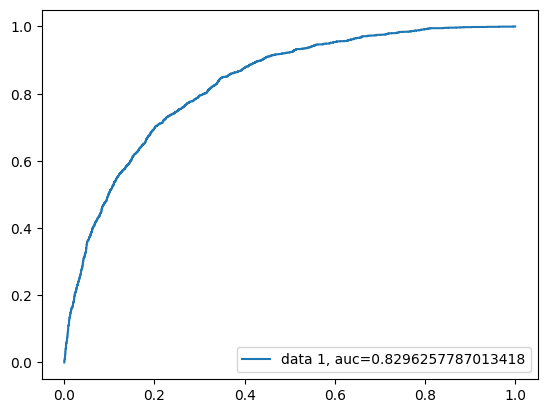

In [17]:
#ROC Curve
import matplotlib.pyplot as plt

y_pred_probability = model1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [24]:
#now checking from the test data
test = pd.read_csv ("census-income.test.csv", index_col = None, names=['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', "hours_per_week", "native_country", 'income'])

test.head()

#encoding categorical variables to numeric codes
from sklearn.preprocessing import LabelEncoder

#calling labelencoder
lab_enc = LabelEncoder()

#performing label encoding in the select features
test['workclass'] = lab_enc.fit_transform(test['workclass'])
test['education'] = lab_enc.fit_transform(test['education'])
test['marital_status'] = lab_enc.fit_transform(test['marital_status'])
test['occupation'] = lab_enc.fit_transform(test['occupation'])
test['relationship'] = lab_enc.fit_transform(test['relationship'])
test['race'] = lab_enc.fit_transform(test['race'])
test['sex'] = lab_enc.fit_transform(test['sex'])
test['native_country'] = lab_enc.fit_transform(test['native_country'])



In [25]:
test['income'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [26]:
print(test['income'].value_counts())

#Encoding for label. If <=50k then 0 else 1
label_info = {' <=50K.':0, ' >50K.':1}
test['income'] = test['income'].map(label_info)
# # source:https://stackoverflow.com/questions/65716571/encoding-column-pandas-using-if-condition

# # after encoding 
print(f"After encoding", test['income'].value_counts())

income
 <=50K.    12435
 >50K.      3846
Name: count, dtype: int64
After encoding income
0    12435
1     3846
Name: count, dtype: int64


In [27]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0


In [29]:
#from the real test data
x_test_real = test[selected_features]
y_test_real = test.income


y_pred_real = model1.predict(x_test_real)


#Evaluation of model

#first using confusion matrix

from sklearn import metrics

confusion_mat = metrics.confusion_matrix(y_test_real, y_pred_real)
confusion_mat

array([[11579,   856],
       [ 2331,  1515]], dtype=int64)

In [30]:
#Classification report
from sklearn.metrics import classification_report

income_label = ['<=50k', '>50k']

print(classification_report(y_test_real, y_pred_real, target_names=income_label))

              precision    recall  f1-score   support

       <=50k       0.83      0.93      0.88     12435
        >50k       0.64      0.39      0.49      3846

    accuracy                           0.80     16281
   macro avg       0.74      0.66      0.68     16281
weighted avg       0.79      0.80      0.79     16281



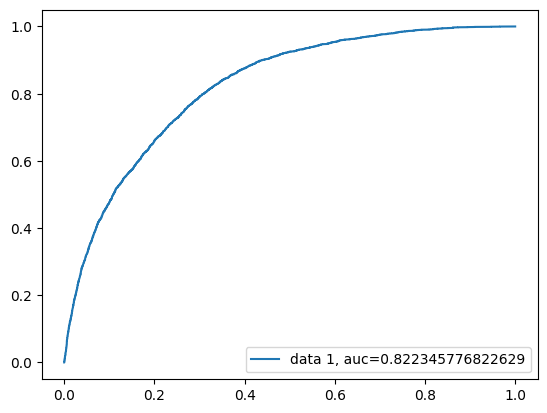

In [32]:
#ROC Curve
import matplotlib.pyplot as plt

y_pred_probability_real = model1.predict_proba(x_test_real)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_real, y_pred_probability_real)
auc = metrics.roc_auc_score(y_test_real, y_pred_probability_real)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()